In [84]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib

%matplotlib inline

pd.set_option("display.max_columns",40)

In [2]:
# starting with getting the data von sportradar

url = 'https://api.sportradar.us/nba/trial/v7/en/league/hierarchy.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
spora1 = requests.get(url)

In [3]:
leag = spora1.json()

In [4]:
# in leag we find the id's for Houston and Milwaukee
#houston = 583ecb3a-fb46-11e1-82cb-f4ce4684ea4c
#milwaukee = 583ecefd-fb46-11e1-82cb-f4ce4684ea4c

In [5]:
#Getting the player id's from the team roster
#Houston first

url = 'https://api.sportradar.us/nba/trial/v7/en/teams/583ecb3a-fb46-11e1-82cb-f4ce4684ea4c/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
houston= requests.get(url)

In [6]:
houston2 = houston.json()

In [7]:
# Westbrook ID 74a45eed-f2b0-4886-ae71-d04cf7d59528
# James ID a52b2c84-9c3d-4d6e-8a3b-10e75d11c2bc

In [8]:
#now Milwaukee

url = 'https://api.sportradar.us/nba/trial/v7/en/teams/583ecefd-fb46-11e1-82cb-f4ce4684ea4c/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
milwaukee= requests.get(url)

In [9]:
milwaukee2 = milwaukee.json()

In [10]:
# Giannis ID  6c60282d-165a-4cba-8e5a-4f2d9d4c5905

In [11]:
# Russell stats from sportradar

url = 'https://api.sportradar.us/nba/trial/v7/en/players/74a45eed-f2b0-4886-ae71-d04cf7d59528/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
russ1= requests.get(url)

In [85]:
russ2 = russ1.json()
russ3 = russ2['seasons'].copy()
dfruss1 =pd.DataFrame()


""


In [13]:
for i in range(len(russ3)):
    russ4 = russ3[i]['teams']
    dfruss1 = dfruss1.append(russ4[0]['average'], ignore_index=True)

In [14]:
rename_list = dfruss1.keys()
dic_rename = {}

for i in range(len(rename_list)):
    var_a = rename_list[i] + '_pG'
    dic_rename.update({rename_list[i]:var_a})

In [15]:
dfruss1.rename(dic_rename, axis=1, inplace=True)

In [16]:
#now get the data for James Harden

In [17]:
url = 'https://api.sportradar.us/nba/trial/v7/en/players/a52b2c84-9c3d-4d6e-8a3b-10e75d11c2bc/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
harden1= requests.get(url)

In [18]:
harden2 = harden1.json()
harden3 = harden2['seasons'].copy()
dfharden1 =pd.DataFrame()

In [19]:
for i in range(len(harden3)):
    harden4 = harden3[i]['teams']
    dfharden1 = dfharden1.append(harden4[0]['average'], ignore_index=True)

In [20]:
dfharden1.rename(dic_rename, axis=1, inplace=True)

In [21]:
# get the Giannis sportradar data

In [22]:
url = 'https://api.sportradar.us/nba/trial/v7/en/players/6c60282d-165a-4cba-8e5a-4f2d9d4c5905/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
giannis1= requests.get(url)

In [23]:
giannis2 = giannis1.json()
giannis3 = giannis2['seasons'].copy()
dfgiannis1 =pd.DataFrame()

In [24]:
for i in range(len(giannis3)):
    giannis4 = giannis3[i]['teams']
    dfgiannis1 = dfgiannis1.append(giannis4[0]['average'], ignore_index=True)

In [25]:
dfgiannis1.rename(dic_rename, axis=1, inplace=True)

In [86]:
dfgiannis1

,assists_pG,blocked_att_pG,blocks_pG,def_rebounds_pG,efficiency_pG,fast_break_att_pG,fast_break_made_pG,fast_break_pts_pG,field_goals_att_pG,field_goals_made_pG,flagrant_fouls_pG,fouls_drawn_pG,free_throws_att_pG,free_throws_made_pG,minutes_pG,off_rebounds_pG,offensive_fouls_pG,personal_fouls_pG,points_pG,points_in_paint_pG,points_in_paint_att_pG,points_in_paint_made_pG,points_off_turnovers_pG,rebounds_pG,second_chance_att_pG,second_chance_made_pG,second_chance_pts_pG,steals_pG,three_points_att_pG,three_points_made_pG,true_shooting_att_pG,turnovers_pG,two_points_att_pG,two_points_made_pG
0,5.5,1.25,1.29,10.50,35.08,3.88,2.54,6.29,20.33,11.46,0.04,8.79,10.83,6.38,31.6,2.71,1.21,3.21,30.9,18.58,13.83,9.29,5.54,13.21,2.25,1.54,4.13,1.29,4.96,1.58,25.10,3.79,15.38,9.88
1,5.9,1.39,1.53,10.26,35.25,2.31,1.69,4.68,17.32,10.01,0.01,7.69,9.53,6.94,32.8,2.21,0.94,3.22,27.7,17.47,12.92,8.74,3.94,12.47,1.83,1.15,2.93,1.28,2.82,0.72,21.51,3.72,14.50,9.29
2,4.8,1.13,1.41,7.96,30.75,2.51,1.77,4.72,18.69,9.89,0.03,6.83,8.55,6.49,36.7,2.08,0.52,3.08,26.9,15.65,12.37,7.83,4.20,10.04,2.04,1.23,3.04,1.45,1.87,0.57,22.45,2.97,16.83,9.32
3,5.4,0.88,1.89,6.98,28.38,0.00,0.00,0.00,15.74,8.20,0.00,0.00,7.65,5.89,36.5,1.78,0.00,3.08,22.9,0.00,0.00,0.00,0.39,8.75,0.00,0.00,0.13,1.64,2.25,0.61,19.10,2.93,13.49,7.59
4,4.3,0.78,1.41,6.24,21.16,0.00,0.00,0.00,12.66,6.41,0.01,0.00,5.11,3.70,35.3,1.41,0.00,3.23,16.9,0.00,0.00,0.00,0.16,7.65,0.00,0.00,0.04,1.18,1.36,0.35,14.91,2.60,11.30,6.06
5,2.6,0.80,1.05,5.46,15.77,0.00,0.00,0.00,9.63,4.73,0.00,0.00,4.28,3.17,31.4,1.23,0.00,3.14,12.7,0.00,0.00,0.00,0.09,6.69,0.00,0.00,0.05,0.90,0.54,0.09,11.51,2.14,9.09,4.64
6,1.9,0.38,0.79,3.39,9.14,0.00,0.00,0.00,5.43,2.25,0.00,0.00,2.62,1.79,24.6,1.01,0.00,2.25,6.8,0.00,0.00,0.00,0.03,4.40,0.00,0.00,0.03,0.78,1.53,0.53,6.58,1.58,3.90,1.71


In [27]:
#dfgiannis1.keys()

In [28]:
#dfgiannis2 = dfgiannis1[['points_pG', 'rebounds_pG']]

In [29]:
# Now we need the data from nba.com
# We also need the player id's here. Getting them from the allplayers list


In [30]:
url = 'https://stats.nba.com/stats/commonallplayers?IsOnlyCurrentSeason=0&LeagueID=00&Season=2018-19'

headers = {'user-agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'),
          'referer': 'http://stats.nba.com/players/'}

In [31]:
allplayers1 =  requests.get(url, headers= headers)


In [32]:
type(allplayers1)

requests.models.Response

In [33]:
allplayers2 = allplayers1.json()
allplayers3 = allplayers2['resultSets'].copy()
allplayers4 = allplayers3[0].copy()

In [34]:
allplayers2 = allplayers1.json()

In [35]:
type(allplayers2)

dict

In [36]:
allplayers4['headers']

['PERSON_ID',
 'DISPLAY_LAST_COMMA_FIRST',
 'DISPLAY_FIRST_LAST',
 'ROSTERSTATUS',
 'FROM_YEAR',
 'TO_YEAR',
 'PLAYERCODE',
 'TEAM_ID',
 'TEAM_CITY',
 'TEAM_NAME',
 'TEAM_ABBREVIATION',
 'TEAM_CODE',
 'GAMES_PLAYED_FLAG',
 'OTHERLEAGUE_EXPERIENCE_CH']

In [37]:
headerlist = allplayers4['headers']
dfplayerlist = pd.DataFrame.from_dict(allplayers4['rowSet'])

In [38]:
dfplayerlist.columns = headerlist

In [39]:
dfplayerlist.head(20)

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y,00
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y,00
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y,00
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y,00
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y,00
5,949,"Abdur-Rahim, Shareef",Shareef Abdur-Rahim,0,1996,2007,shareef_abdur-rahim,0,,,,,Y,00
6,76005,"Abernethy, Tom",Tom Abernethy,0,1976,1980,HISTADD_tom_abernethy,0,,,,,Y,00
7,76006,"Able, Forest",Forest Able,0,1956,1956,HISTADD_frosty_able,0,,,,,Y,00
8,76007,"Abramovic, John",John Abramovic,0,1946,1947,HISTADD_brooms_abramovic,0,,,,,Y,00
9,203518,"Abrines, Alex",Alex Abrines,0,2016,2018,alex_abrines,0,,,,,Y,00


In [40]:
#getting the id's by searching up the names with loc function

dfplayerlist.loc[dfplayerlist['DISPLAY_FIRST_LAST'] == 'Giannis Antetokounmpo']   #for example

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
105,203507,"Antetokounmpo, Giannis",Giannis Antetokounmpo,1,2013,2019,giannis_antetokounmpo,1610612749,Milwaukee,Bucks,MIL,bucks,Y,00


In [41]:
#player id's
#Giannis id 203507
#Harden id 201935
#Westbrook id 201566


In [42]:
#Start getting the data for Westbrook from nba.com

In [43]:
russ_url = 'https://stats.nba.com/stats/playerprofilev2?LeagueID=&PerMode=Totals&PlayerID=201566'



In [44]:
russnba1 = requests.get(russ_url, headers= headers)
russnba2 = russnba1.json()

In [45]:
russnba3 = russnba2['resultSets'].copy()
russnba4 = russnba3[0].copy()
playerheaderlist = russnba4['headers']

In [46]:
dfrussnba = pd.DataFrame.from_dict(russnba4['rowSet'])
dfrussnba.columns = playerheaderlist

In [93]:
dfrussnba2 = dfrussnba[::-1].copy()
dfrussnba2.reset_index(drop=True, inplace=True)
dfrussnba2.iloc[[1]]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
1,201566,2018-19,00,1610612760,OKC,30.0,73,73,2629,630,1473,0.428,119,411,0.29,296,451,0.656,109,698,807,784,142,33,325,245,1675


In [48]:
#merging the two tables. using the sportradar table as left table.

In [49]:
dfruss_merged = dfruss1.merge(dfrussnba2, left_index=True, right_index=True)

In [ ]:
#writing the data into pickle file
#dfruss_merged.to_pickle('Westbrookfinal.pkl')

In [ ]:
#Getting the James Harden data from stats.nba.com

In [50]:
harden_url = 'https://stats.nba.com/stats/playerprofilev2?LeagueID=&PerMode=Totals&PlayerID=201935'



In [51]:
hardnba1 = requests.get(harden_url, headers= headers)
hardnba2 = hardnba1.json()

In [52]:
hardnba3 = hardnba2['resultSets'].copy()
hardnba4 = hardnba3[0].copy()

In [53]:
dfhardnba = pd.DataFrame.from_dict(hardnba4['rowSet'])
dfhardnba.columns = playerheaderlist

In [54]:
dfhardnba2 = dfhardnba[::-1].copy()
dfhardnba2.reset_index(drop=True, inplace=True)

In [55]:
#merging the two tables. using the sportradar table as left table.
dfhard_merged = dfharden1.merge(dfhardnba2, left_index=True, right_index=True)

In [56]:
#writing the data into pickle file
#dfhard_merged.to_pickle('JamesHardenfinal.pkl')

In [57]:
#Giannis nba data

In [59]:
giannis_url = 'https://stats.nba.com/stats/playerprofilev2?LeagueID=&PerMode=Totals&PlayerID=203507'



In [60]:
giannisnba1 = requests.get(giannis_url, headers= headers)
giannisnba2 = giannisnba1.json()

In [61]:
giannisnba3 = giannisnba2['resultSets'].copy()
giannisnba4 = giannisnba3[0].copy()

In [62]:
dfgiannisnba = pd.DataFrame.from_dict(giannisnba4['rowSet'])
dfgiannisnba.columns = playerheaderlist

In [83]:
dfgiannisnba2 = dfgiannisnba[::-1].copy()
dfgiannisnba2.reset_index(drop=True, inplace=True)
dfgiannisnba2

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203507,2019-20,00,1610612749,MIL,25.0,24,24,758,275,...,0.588,65,252,317,133,31,31,91,77,741
1,203507,2018-19,00,1610612749,MIL,24.0,72,72,2358,721,...,0.729,159,739,898,424,92,110,268,232,1994
2,203507,2017-18,00,1610612749,MIL,23.0,75,75,2756,742,...,0.760,156,597,753,361,109,106,223,231,2014
3,203507,2016-17,00,1610612749,MIL,22.0,80,80,2845,656,...,0.770,142,558,700,434,131,151,234,246,1832
4,203507,2015-16,00,1610612749,MIL,21.0,80,79,2823,513,...,0.724,113,499,612,345,94,113,208,258,1350
5,203507,2014-15,00,1610612749,MIL,20.0,81,71,2541,383,...,0.741,100,442,542,207,73,85,173,254,1030
6,203507,2013-14,00,1610612749,MIL,19.0,77,23,1897,173,...,0.683,78,261,339,150,60,61,122,173,525


In [64]:
#merging the two tables. using the sportradar table as left table.
dfgiannis_merged = dfgiannis1.merge(dfgiannisnba2, left_index=True, right_index=True)

In [65]:
#writing the data into pickle file
#dfgiannis_merged.to_pickle('GiannisAntofinal.pkl')

In [66]:
#using data for some plots, using subsets to get a cleaner view
#westbrook first

In [67]:
dfruss_sub = dfruss_merged[['SEASON_ID', 'points_pG', 'assists_pG','rebounds_pG','turnovers_pG','free_throws_att_pG' ]]
dfruss_sub

,SEASON_ID,points_pG,assists_pG,rebounds_pG,turnovers_pG,free_throws_att_pG
0,2019-20,22.4,7.5,8.10,4.57,6.14
1,2018-19,22.9,10.7,11.05,4.45,6.18
2,2017-18,25.4,10.3,10.05,4.76,7.08
3,2016-17,31.6,10.4,10.67,5.41,10.37
4,2015-16,23.5,10.4,7.83,4.28,7.16
5,2014-15,28.1,8.6,7.28,4.37,9.76
6,2013-14,21.8,6.9,5.72,3.85,6.37


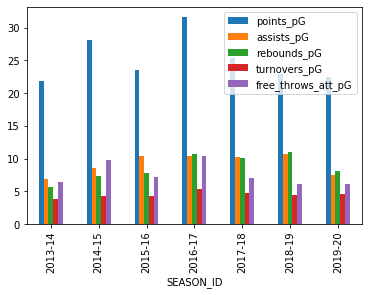

In [69]:
dfruss_sub[::-1].plot(x='SEASON_ID', y =['points_pG', 'assists_pG','rebounds_pG', 'turnovers_pG','free_throws_att_pG'], kind='bar');

In [70]:
dfruss_sub2 = dfruss_merged[['SEASON_ID', 'FG_PCT', 'FG3_PCT','FT_PCT' ]]
dfruss_sub2

,SEASON_ID,FG_PCT,FG3_PCT,FT_PCT
0,2019-20,0.421,0.229,0.744
1,2018-19,0.428,0.290,0.656
2,2017-18,0.449,0.298,0.737
3,2016-17,0.425,0.343,0.845
4,2015-16,0.454,0.296,0.812
5,2014-15,0.426,0.299,0.835
6,2013-14,0.437,0.318,0.826


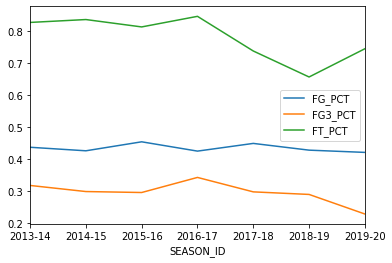

In [71]:
dfruss_sub2[::-1].plot(x='SEASON_ID', y =[ 'FG_PCT', 'FG3_PCT','FT_PCT']);

In [72]:
#harden plots

In [74]:
dfharden_sub = dfhard_merged[['SEASON_ID', 'points_pG', 'assists_pG','rebounds_pG','turnovers_pG','free_throws_att_pG' ]]
dfharden_sub

,SEASON_ID,points_pG,assists_pG,rebounds_pG,turnovers_pG,free_throws_att_pG
0,2019-20,38.0,7.5,6.04,5.09,14.35
1,2018-19,36.1,7.5,6.64,4.96,11.00
2,2017-18,30.4,8.8,5.40,4.38,10.10
3,2016-17,29.1,11.2,8.14,5.73,10.88
4,2015-16,29.0,7.5,6.11,4.56,10.21
5,2014-15,27.4,7.0,5.67,3.96,10.17
6,2013-14,25.4,6.1,4.71,3.63,9.11


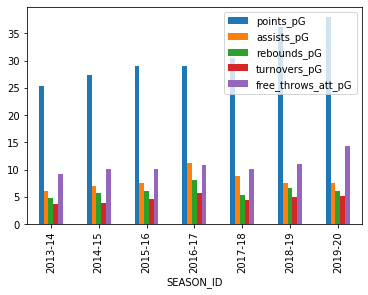

In [75]:
dfharden_sub[::-1].plot(x='SEASON_ID', y =['points_pG', 'assists_pG','rebounds_pG', 'turnovers_pG','free_throws_att_pG'], kind='bar');

In [76]:
dfharden_sub2 = dfhard_merged[['SEASON_ID', 'FG_PCT', 'FG3_PCT','FT_PCT' ]]
dfharden_sub2

,SEASON_ID,FG_PCT,FG3_PCT,FT_PCT
0,2019-20,0.431,0.338,0.879
1,2018-19,0.442,0.368,0.879
2,2017-18,0.449,0.367,0.858
3,2016-17,0.440,0.347,0.847
4,2015-16,0.439,0.359,0.860
5,2014-15,0.440,0.375,0.868
6,2013-14,0.456,0.366,0.866


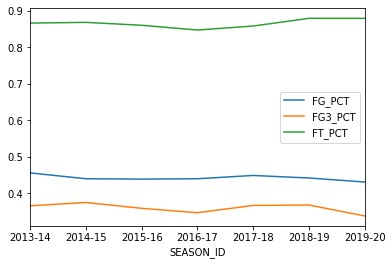

In [77]:
dfharden_sub2[::-1].plot(x='SEASON_ID', y =[ 'FG_PCT', 'FG3_PCT','FT_PCT']);

In [78]:
#plotting for giannis

In [79]:
dfgiannis_sub = dfgiannis_merged[['SEASON_ID', 'points_pG', 'assists_pG','rebounds_pG','turnovers_pG','free_throws_att_pG' ]]
dfgiannis_sub

,SEASON_ID,points_pG,assists_pG,rebounds_pG,turnovers_pG,free_throws_att_pG
0,2019-20,30.9,5.5,13.21,3.79,10.83
1,2018-19,27.7,5.9,12.47,3.72,9.53
2,2017-18,26.9,4.8,10.04,2.97,8.55
3,2016-17,22.9,5.4,8.75,2.93,7.65
4,2015-16,16.9,4.3,7.65,2.60,5.11
5,2014-15,12.7,2.6,6.69,2.14,4.28
6,2013-14,6.8,1.9,4.40,1.58,2.62


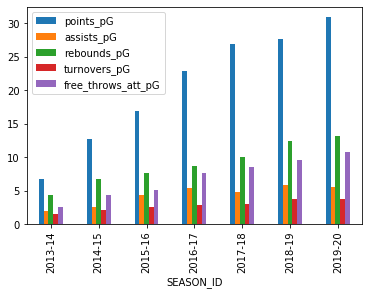

In [80]:
dfgiannis_sub[::-1].plot(x='SEASON_ID', y =['points_pG', 'assists_pG','rebounds_pG', 'turnovers_pG','free_throws_att_pG'], kind='bar');

In [81]:
dfgiannis_sub2 = dfgiannis_merged[['SEASON_ID', 'FG_PCT', 'FG3_PCT','FT_PCT' ]]
dfgiannis_sub2

,SEASON_ID,FG_PCT,FG3_PCT,FT_PCT
0,2019-20,0.564,0.319,0.588
1,2018-19,0.578,0.256,0.729
2,2017-18,0.529,0.307,0.760
3,2016-17,0.521,0.272,0.770
4,2015-16,0.506,0.257,0.724
5,2014-15,0.491,0.159,0.741
6,2013-14,0.414,0.347,0.683


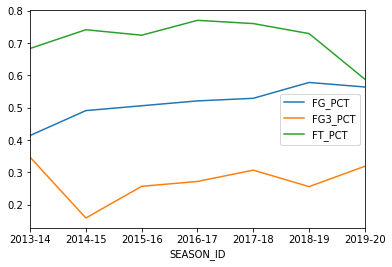

In [82]:
dfgiannis_sub2[::-1].plot(x='SEASON_ID', y =[ 'FG_PCT', 'FG3_PCT','FT_PCT']);